<a href="https://colab.research.google.com/github/6arlos6/Grover_algorithm/blob/main/Definitiva_Grover_bebe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install qiskit

In [ ]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [ ]:
def Toffoli_neg(qc,input, output):
  for qbi in input:
    qc.x(qbi)
  qc.mct(input, output)
  for qbi in input:
    qc.x(qbi)
def f_boolean_rc(qc,input,output):
  if len(input) == 3:
    A = input[0]
    B = input[1]
    C = input[2]
    Toffoli_neg(qc, [A,B], output)
    qc.barrier()
    Toffoli_neg(qc, [A,C], output)
    qc.barrier()
    Toffoli_neg(qc, [B,C], output)
    qc.barrier()
  elif len(input) == 2:
    A = input[0]
    B = input[1]
    qc.barrier()
    Toffoli_neg(qc, [A], output)
    qc.barrier()
    Toffoli_neg(qc, [B], output)
    qc.barrier()
def f_boolean_d(qc,input,output):
  qc.mct(input,output)
  qc.x(output)
  qc.barrier() 

In [ ]:
List_couple_rc = [[2,3,4,6],
                  [1,5,7],
                  [0,2,8],
                  [1,3,9],
                  [5,4,10]]
List_couple_d = [[0,1,11],
                 [1,2,12]]

In [ ]:
def oracle(qc,clause_qubits, output_qubit,L1,L2):
  for entry in L1:
    n = len(entry)
    f_boolean_rc(qc,entry[0:n-1],entry[-1])
  for entry in L2:
    n = len(entry)
    f_boolean_d(qc,entry[0:n-1],entry[-1])
  qc.mct(clause_qubits, output_qubit)
  qc.barrier()
  for entry in L1:
    n = len(entry)
    f_boolean_rc(qc,entry[0:n-1],entry[-1])
  for entry in L2:
    n = len(entry)
    f_boolean_d(qc,entry[0:n-1],entry[-1])

In [ ]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

In [ ]:
var_qubits = QuantumRegister(6, name='v')
clause_qubits = QuantumRegister(7, name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(6, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)
# Initialize 'out0' in state |->
qc.initialize([1, -1]/np.sqrt(2), output_qubit)
# Initialize qubits in state |s>
qc.h(var_qubits)
qc.barrier()  # for visual separation
for i in range(8):
  ## First Iteration
  # Apply our oracle
  oracle(qc,clause_qubits, output_qubit,List_couple_rc,List_couple_d)
  qc.barrier()  # for visual separation
  # Apply our diffuser
  qc.append(diffuser(6), [0,1,2,3,4,5])
qc.measure(var_qubits, cbits)
qc.draw(fold=-1)

┌───┐               ░                 ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░       ░                 ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░  ░ ┌────────┐                ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░       ░                 ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░  ░ ┌────────┐                ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░       ░                 ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░  ░ ┌────────┐                ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░       ░                 ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░  ░ ┌────────┐                ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░       ░                 ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░  ░ ┌────────┐                ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░       ░                 ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░  ░ ┌────────┐                ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░       ░                 ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░  ░ ┌────────┐                ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░       ░                 ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░  ░ ┌────────┐┌─┐               
    v_0: ──────

In [ ]:
# Simulate and plot results
aer_simulator = Aer.get_backend('aer_simulator')
transpiled_qc = transpile(qc, aer_simulator)
qobj = assemble(transpiled_qc)
result = aer_simulator.run(qobj).result()

In [ ]:
k =result.get_counts()
for a in result.get_counts(): 
  print(a,k[a])

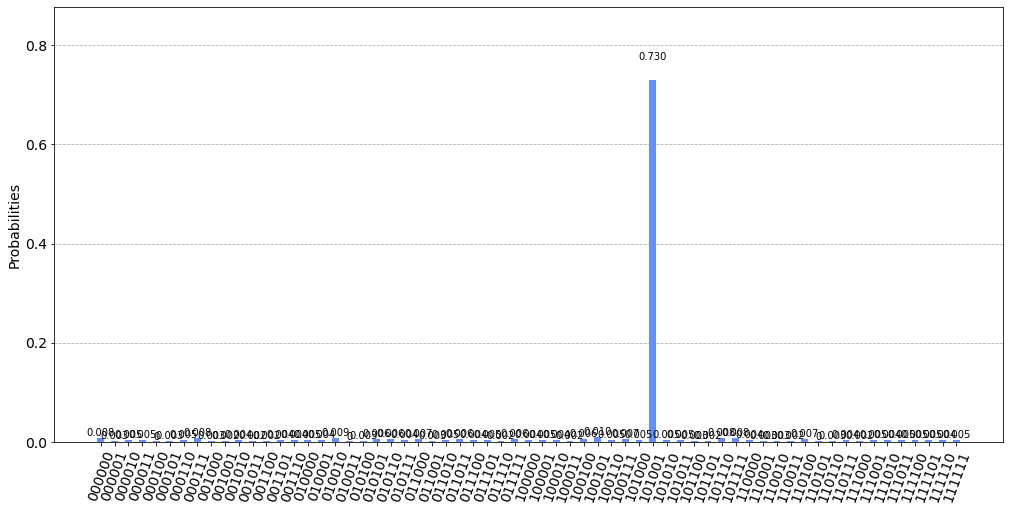

In [ ]:
plot_histogram(result.get_counts(),figsize=(17, 8))

In [ ]:
print(np.sqrt(2**6))

8.0
